In [1]:
import os
import math
import random
import numpy
import pandas as pd

In [2]:
indexcols = ['grc__Risk_Name__c', 'ExtractDate', 'Risk__Mitigation__c',
            'Business_Unit__c', 'Risk__Type__c', 'ReportingMonth', 'grc__Status__c', 
            'Design_Element__c',
            'XactHE__Contractual_Allocation__c']
# mainfilepath = os.getcwd() + "\\csv\\Xactium.csv"
mainfilepath = os.getcwd() + "\\Xactium+Other.csv"
df = pd.read_csv(mainfilepath, index_col=indexcols).sort_index()

In [3]:
df2 = {}
for i, row in enumerate(df.itertuples()):
    try:
        if i < 1:
            print(row)
#         if i > 10:
#             break
        if row.Index not in df2:
            df2[row.Index] = {}

        if row[0][4]=='Opportunity':
            mult = -1
        else:
            mult = 1
        if row[4]=='Likelihood':
            if pd.isna(row[2]):
                df2[row.Index]['likelihood'] = 0
            elif row[2]==None:
                df2[row.Index]['likelihood'] = 0
            else:
                df2[row.Index]['likelihood'] = row[2]/100
#             tup = extra_df[extra_df['grc__risk_Name__c']==row[0][0]].iloc[0]
#             df2[row.Index]['Name'] = tup['Name']
#             df2[row.Index]['RBS_Code__c'] = tup['RBS_Code__c']
#             df2[row.Index]['grc__Subcategory__c'] = tup['grc__Subcategory__c']
        elif row[4]=='Cost':
            if (row[1]*mult > row[3]*mult):  # reversed
                df2[row.Index]['c_worst'] = row[1] * mult
                df2[row.Index]['c_mid'] = row[2] * mult
                df2[row.Index]['c_best'] = row[3] * mult
            else:
                df2[row.Index]['c_best'] = row[1] * mult
                df2[row.Index]['c_mid'] = row[2] * mult
                df2[row.Index]['c_worst'] = row[3] * mult
        # elif row[4]=='Time':
        #     df2[row.Index]['t_best'] = row[1] * mult
        #     df2[row.Index]['t_mid'] = row[2] * mult
        #     df2[row.Index]['t_worst'] = row[3] * mult
        elif pd.isna(row[4]):
            pass
        # else:
        #     df2[row.Index][row[4]] = 1
    except Exception as e:
        print("Error on iteration "+str(i)+": "+str(row))
        print(e)
        break

df2 = pd.DataFrame(df2).transpose()
# df2.head()

Pandas(Index=('R10115', '01/05/2019', 'Residual', 'A14 Section 3', 'Threat', '01/04/2019', 'Closed', nan, 'Supplier'), Risk__Best_Case__c=100.0, Risk__Value__c=100.0, Risk__Worst_Case__c=100.0, Risk__Category__c='Likelihood')


In [4]:
df2.shape

(65853, 4)

In [5]:
df3 = df2.reset_index(col_fill=indexcols).rename(columns={
    "level_0": "grc__Risk_Name__c",
    "level_1": "ExtractDate",
    "level_2": "Risk__Mitigation__c",
    "level_3": "Business_Unit__c",
    "level_4": "Risk__Type__c",
    "level_5": "ReportingMonth",
    "level_6": "grc__Status__c",
    "level_7": "Design_Element__c",
    "level_8": "XactHE__Contractual_Allocation__c"
})

In [6]:
maindf = df3.drop(labels=["Risk__Type__c","Design_Element__c","XactHE__Contractual_Allocation__c"], axis='columns')
maindf.dropna(inplace=True)
maindf.shape

(58837, 10)

In [ ]:
# def collapse(best=100, expected=120, worst=250, prob=0.2):
#     if prob == None:
#         return 0
#     if math.isnan(prob):
#         return 0
#     if expected < best or worst < expected:
#         return 0
#     if prob < random.random():
#         return 0

#     mu = (best + 4*expected + worst)/6
#     sd = (mu-best)*(worst-mu)
#     sd = abs(sd)/7
#     sd = math.sqrt(sd)

#     return float(round(random.normalvariate(float(mu),float(sd))))

# def collapsevector(b_, e_, w_, p_) :
#     # require b_.length == e_.length etc.
#     return sum(
#         list(map(
#             lambda k: collapse( best=b_[k], expected=e_[k], worst=w_[k], prob=p_[k]  ),
#             range(len(b_))
#         ))
#     )

# def collapsevectorsample(b_, e_, w_, p_, numberofsamples=0):
#     # require b_length == e_.length etc.
#     max_samples = len(b_)
#     if numberofsamples==0:  numberofsamples=max_samples;

#     if numberofsamples < max_samples:
#         ix = numpy.random.choice(max_samples,  numberofsamples, False)
#         b_ = [ b_[k] for k in ix ]
#         e_ = [ e_[k] for k in ix ]
#         w_ = [ w_[k] for k in ix ]
#         p_ = [ p_[k] for k in ix ]

#     return round(max_samples*collapsevector(b_, e_, w_, p_)/numberofsamples);

# def collapse_many(b_, e_, w_, p_, number_of_times=1, numberofsamples=0):
#     return [ collapsevectorsample(b_, e_, w_, p_, numberofsamples)  for k in range(number_of_times)  ]

In [7]:
indexcols = ['Business_Unit__c', 'grc__Risk_Name__c', 'grc__Status__c', 'Risk__Type__c', 'ExtractDate', 'ReportingMonth']
datesfilepath = os.getcwd() + "\\Monte_Carlo_Risk_Dates.csv"
dates_df = pd.read_csv(datesfilepath, index_col=indexcols).sort_index()
dates_df = dates_df.reset_index(col_fill=indexcols).rename(columns={
    "level_0": "grc__Risk_Name__c",
    "level_1": "ExtractDate",
    "level_2": "Risk__Mitigation__c",
    "level_3": "Business_Unit__c",
    "level_4": "Risk__Type__c",
    "level_5": "ReportingMonth",
    "level_6": "grc__Status__c",
    "level_7": "Design_Element__c",
    "level_8": "XactHE__Contractual_Allocation__c"
})
# dates_df.head(2)

In [8]:
mainwithdates = maindf.join(dates_df, lsuffix="", rsuffix="_dates")
# mainwithdates.head()

In [9]:
mainwithdates = mainwithdates.drop(labels=["Business_Unit__c_dates","grc__Risk_Name__c_dates","grc__Status__c_dates","ExtractDate_dates","ReportingMonth_dates"], axis='columns')
# mainwithdates.dropna(inplace=True)
# mainwithdates.shape

In [10]:
mainwithdates.to_csv("Risk_with_dates.csv")
maindf = mainwithdates

In [11]:
# Select filters
bu = "A14 Section 2"
ReportingMonth = "01/05/2019"
mitigation = "Residual"

# Filter data
colslist = [
        'grc__Risk_Name__c', 'Business_Unit__c', 'Risk__Mitigation__c', 'Risk__Type__c', 'ReportingMonth', 'grc__Status__c',
        'c_best', 'c_mid', 'c_worst', 'likelihood', 'Start_Date_of_Risk__c', 'End_Date_of_Risk__c'
]
tmp = maindf.loc[maindf['Risk__Mitigation__c'] == mitigation, colslist]
tmp2 = tmp.loc[tmp['ReportingMonth'] == ReportingMonth, colslist]
if bu != "All":
    scenario = tmp2.loc[tmp2['Business_Unit__c'] == bu, colslist]
else:
    scenario = tmp2
scenario.head()

,grc__Risk_Name__c,Business_Unit__c,Risk__Mitigation__c,Risk__Type__c,ReportingMonth,grc__Status__c,c_best,c_mid,c_worst,likelihood,Start_Date_of_Risk__c,End_Date_of_Risk__c
5071,R12023,A14 Section 2,Residual,NaN,01/05/2019,Closed,400000.0,500000.0,600000.0,0.18,NaN,NaN
5122,R12024,A14 Section 2,Residual,NaN,01/05/2019,Closed,400000.0,500000.0,600000.0,0.18,NaN,NaN
5215,R12027,A14 Section 2,Residual,NaN,01/05/2019,Closed,40000.0,50000.0,60000.0,0.70,NaN,NaN
5287,R12029,A14 Section 2,Residual,NaN,01/05/2019,Closed,400000.0,500000.0,600000.0,0.50,NaN,NaN
5338,R12030,A14 Section 2,Residual,NaN,01/05/2019,Closed,640000.0,800000.0,960000.0,0.50,NaN,NaN


In [12]:
scenario.shape

(247, 12)

In [13]:
def colpse(it):
    if random.random() >= it['likelihood']:
        return {'id': it['grc__Risk_Name__c'], 'contrib': 0}
    else:
        return {'id': it['grc__Risk_Name__c'], 'contrib': random.triangular(it['c_best'], it['c_worst'], it['c_mid'])}

In [14]:
def all_risks_vals(risks):
    df = []
    for idx, it in risks.iterrows():
        df.append(colpse(it))
    return sorted(df, key=lambda tup: tup['contrib'])

In [15]:
def one_sample_all_risks(risks):
    x = all_risks_vals(risks)
    tot = list(map(lambda it: it['contrib'], x))
    return {
        'amount': sum(tot),
        'keyrisk1': x[-1]['id'],
        'keyrisk1_val': x[-1]['contrib'],
        'keyrisk2': x[-2]['id'],
        'keyrisk2_val': x[-2]['contrib'],
        'keyrisk3': x[-3]['id'],
        'keyrisk3_val': x[-3]['contrib'],
        'keyopp1': x[0]['id'],
        'keyopp1_val': x[0]['contrib'],
        'keyopp2': x[1]['id'],
        'keyopp2_val': x[1]['contrib'],
        'keyopp3': x[2]['id'],
        'keyopp3_val': x[2]['contrib'],
        'sub_total': x[0]['contrib']+x[1]['contrib']+x[2]['contrib']+x[-1]['contrib']+x[-2]['contrib']+x[-3]['contrib']
    }

In [16]:
def generate_n_samples(risks, n=10):
    return [ one_sample_all_risks(risks) for _ in range(n) ]

In [17]:
%prun samples = pd.DataFrame(generate_n_samples(risks=scenario, n=1000))

         88779979 function calls (87159873 primitive calls) in 72.051 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 12409698    5.527    0.000   10.423    0.000 {built-in method builtins.isinstance}
   875087    3.390    0.000   18.070    0.000 base.py:4342(get_value)
  7797487    3.319    0.000    4.278    0.000 generic.py:7(_check)
   247007    3.055    0.000    4.807    0.000 {pandas._libs.lib.infer_dtype}
   247000    2.248    0.000   47.432    0.000 series.py:152(__init__)
   875087    2.120    0.000   20.849    0.000 series.py:865(__getitem__)
 12023800    2.081    0.000    3.805    0.000 {built-in method builtins.getattr}
   875087    2.053    0.000    2.053    0.000 {method 'get_value' of 'pandas._libs.index.IndexEngine' objects}
   247014    1.666    0.000   27.080    0.000 construction.py:537(sanitize_array)
   494024    1.476    0.000    3.600    0.000 _dtype.py:319(_name_get)
   247016    1.459    0.000    9.

In [18]:
samples.to_csv("samples.csv")

In [ ]:
# rawrisks = pd.DataFrame(list(map(
#     lambda it: {'id': it[1][0], 'best': it[1][6], 'mode': it[1][7], 'worst': it[1][8], 'prob': it[1][9]},
#     scenario.iterrows()
# )))
# rawrisks.shape

In [ ]:
# rawrisks.head()

In [ ]:
# all_risks_vals(rawrisks)

In [ ]:
# one_sample_all_risks(rawrisks)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidip import UniDip

In [20]:
samples = pd.read_csv("samples.csv")

In [ ]:
# samples.head()

In [ ]:
# samples.shape

In [21]:
dat = np.multiply(samples['amount'], 0.000001)

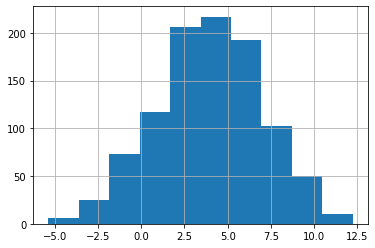

In [25]:
dat = np.msort(dat)
# dat
pd.Series(dat).hist()

In [26]:
# get start and stop indices of peaks 
intervals = UniDip(dat).run()
val_ranges = [(dat[a], dat[b]) for a, b in intervals]
print(val_ranges)

[(-5.365079806527926, 12.228016257594287)]
